# Árbol de decisión y bosque aleatorio

## Ejemplo árbol de decisión con datos de deserción

In [71]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("desercion.csv")

In [73]:
df

,Edad,Género,Promedio,Trabaja,Ingresos,Deserción
0,28,M,4.0,NO,2,NO
1,29,F,4.0,NO,3,NO
2,28,M,4.0,SI,3,SI
3,30,M,4.0,SI,2,SI
4,29,F,3.0,SI,4,SI
5,32,M,3.0,NO,4,SI
6,35,F,4.0,NO,5,SI
7,28,M,3.0,SI,3,SI
8,25,M,5.0,SI,3,SI
9,28,F,4.0,NO,4,NO


In [74]:
df.head()

,Edad,Género,Promedio,Trabaja,Ingresos,Deserción
0,28,M,4.0,NO,2,NO
1,29,F,4.0,NO,3,NO
2,28,M,4.0,SI,3,SI
3,30,M,4.0,SI,2,SI
4,29,F,3.0,SI,4,SI


In [78]:
# codificamos la variable genero
d = {'M': 1, 'F':0}
df['Género'] = df['Género'].map(d)

In [79]:
# codificamos la variable trabaja
d2 = {'SI': 1, 'NO':0}
df['Trabaja'] = df['Trabaja'].map(d2)

In [80]:
#Codificamos la columna Deserción
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Deserción'] = le.fit_transform(df.Deserción)

In [81]:
df

,Edad,Género,Promedio,Trabaja,Ingresos,Deserción
0,28,1,4.0,0,2,0
1,29,0,4.0,0,3,0
2,28,1,4.0,1,3,1
3,30,1,4.0,1,2,1
4,29,0,3.0,1,4,1
5,32,1,3.0,0,4,1
6,35,0,4.0,0,5,1
7,28,1,3.0,1,3,1
8,25,1,5.0,1,3,1
9,28,0,4.0,0,4,0


In [43]:
# obtenemos X e y
X = df.iloc[:,:-1]
y = df['Deserción']

In [82]:
# Entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X, y)

DecisionTreeClassifier()

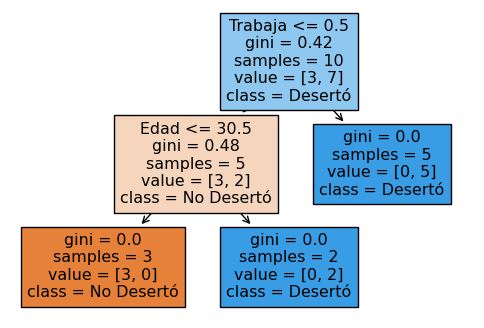

In [83]:
# Visualizar el árbol de decisión
plt.figure(figsize=(6, 4))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Desertó', 'Desertó'])
plt.show()

## Ejemplo árbol de decisión con datos bancarios

In [11]:
# importamos las librerías necesarias
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv("abandono_banco.csv")
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [13]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
# borramos las columnas no relevantes para nuestras pretensiones
df.drop(columns=["RowNumber","CustomerId","Surname"], inplace=True)

In [15]:
#Codificamos las columnas Geography y Gender.
d = {'France': 1, 'Spain': 2, 'Germany': 3 }
df['Geography']=df['Geography'].map(d)
d2 = {'Female': 1, 'Male': 2}
df['Gender']=df['Gender'].map(d2)

In [16]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 10].values

In [17]:
# se separan los datos en conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

In [18]:
# Se escalan las caracteristicas
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [19]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(criterion= 'entropy',random_state= 11)

arbol.fit(X_train, y_train)
print("Exactitud del conjunto de entrenamiento: {:.2f}".format(arbol.score(X_train, y_train)))
print("Exactitud del conjunto de prueba: {:.2f}".format(arbol.score(X_test, y_test)))

Exactitud del conjunto de entrenamiento: 1.00
Exactitud del conjunto de prueba: 0.79


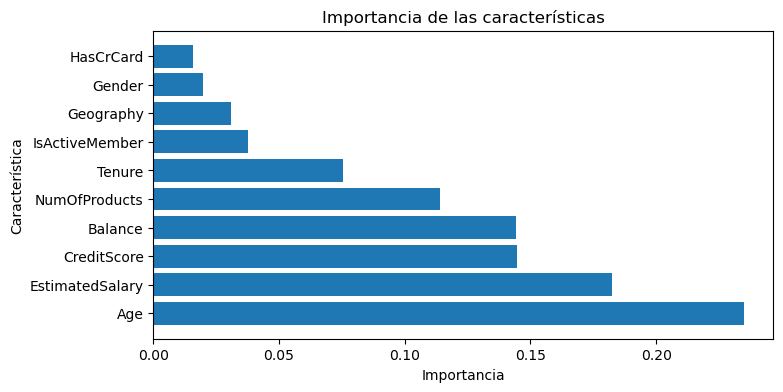

In [20]:
import matplotlib.pyplot as plt	
# Obtener la importancia de las características
importantes = arbol.feature_importances_
# Crear un DataFrame con las características y su importancia
df2 = pd.DataFrame({'Característica': df.columns[:-1] , 'Importancia': importantes})

# Ordenar el DataFrame por importancia de características
df2 = df2.sort_values(by='Importancia', ascending=False)

# Graficar las características importantes
plt.figure(figsize=(8, 4))
plt.barh(df2['Característica'], df2['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características')
plt.show()

## Ejemplo Bosque aleatorio

In [21]:
from sklearn.ensemble import RandomForestClassifier
bosque = RandomForestClassifier(random_state=0, criterion='entropy', n_estimators=100)

bosque.fit(X_train, y_train)
print("Exactitud del conjunto de entrenamiento: {:.2f}".format(bosque.score(X_train, y_train)))
print("Exactitud del conjunto de prueba: {:.2f}".format(bosque.score(X_test, y_test)))

Exactitud del conjunto de entrenamiento: 1.00
Exactitud del conjunto de prueba: 0.86
